# Preprocessing

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load CSV File

In [2]:
df = pd.read_csv('Salaries.csv')

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


### Data Cleaning

In [6]:
df.set_index('Id', inplace=True)

In [7]:
df.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [8]:
df.isnull().sum() # No. of null values in each row

EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [9]:
# Create a function that plots what percentage of each column is null
def plot_percent_null():
    percent_null = df.isnull().sum() * 100 / len(df)
    percent_null = percent_null[percent_null > 0].sort_values()
    sns.barplot(x=percent_null.index, y=percent_null)

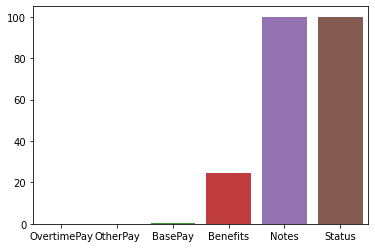

In [10]:
plot_percent_null()

In [11]:
# Notes and Status are completely null
df.drop(['Notes', 'Status'], axis=1, inplace=True)

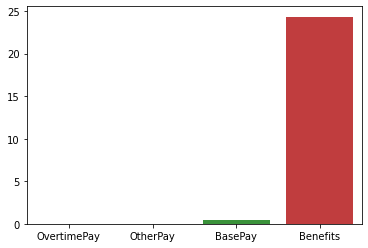

In [12]:
plot_percent_null()

In [13]:
df.head(1)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
Id,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


In [14]:
df['JobTitle'].nunique()
# Too many unique values for One Hot Encoding

2159

In [15]:
df['Agency'].unique()
# Agency has only 1 value

array(['San Francisco'], dtype=object)

In [16]:
# Other than JobTitle and Agency, we will also remove EmployeeName
# As it does not convey any useful information to our algorithm
df.drop(['JobTitle', 'Agency', 'EmployeeName'], axis=1, inplace=True)

In [17]:
df.head(3)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,
1,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
2,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
3,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011


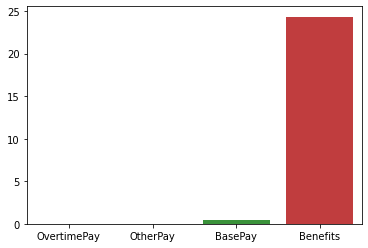

In [18]:
plot_percent_null()

In [19]:
df.sort_values('BasePay').head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,
72833,-166.01,249.02,0.0,6.56,83.01,89.57,2012
72866,-121.63,182.70,0.0,5.44,61.07,66.51,2012
72873,-109.22,163.83,0.0,4.32,54.61,58.93,2012
72875,-106.60,159.90,0.0,4.66,53.30,57.96,2012
72879,-101.88,153.08,0.0,4.55,51.20,55.75,2012


In [20]:
# Negative base pay doesn't make much sense so we can remove those rows
df = df[df['BasePay'] > 0]

In [21]:
df.sort_values('BasePay').head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,
148620,6.04,0.0,10.05,2.30,16.09,18.39,2014
36088,14.25,0.0,56.14,NaN,70.39,70.39,2011
148621,15.50,0.0,0.00,0.16,15.50,15.66,2014
110520,15.83,0.0,0.00,0.16,15.83,15.99,2013
110521,15.83,0.0,0.00,0.16,15.83,15.99,2013


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146736 entries, 1 to 148621
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BasePay           146736 non-null  float64
 1   OvertimePay       146736 non-null  float64
 2   OtherPay          146736 non-null  float64
 3   Benefits          111029 non-null  float64
 4   TotalPay          146736 non-null  float64
 5   TotalPayBenefits  146736 non-null  float64
 6   Year              146736 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 9.0 MB


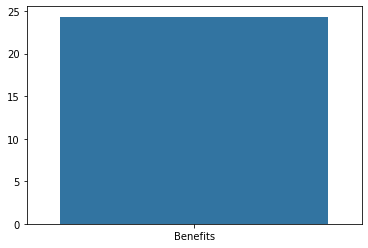

In [23]:
plot_percent_null()

In [24]:
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,
1,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
2,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
3,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
4,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
5,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


In [25]:
df.tail()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,
148614,19.97,0.0,0.00,4.30,19.97,24.27,2014
148617,21.48,0.0,0.86,0.22,22.34,22.56,2014
148618,17.26,0.0,0.00,4.04,17.26,21.30,2014
148620,6.04,0.0,10.05,2.30,16.09,18.39,2014
148621,15.50,0.0,0.00,0.16,15.50,15.66,2014


In [26]:
df['Benefits'].fillna(0, inplace=True)

In [27]:
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,,,,,,,
1,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
2,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
3,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
4,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
5,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


In [28]:
# We can remove the rows that don't add up properly
# Keep in mind that you shouldn't always do this
# It will depend on the situation
df = df[df['TotalPay'] == df['BasePay'] + df['OvertimePay'] + df['OtherPay']]

In [29]:
df = df[df['TotalPayBenefits'] == df['TotalPay'] + df['Benefits']]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101716 entries, 2 to 148621
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BasePay           101716 non-null  float64
 1   OvertimePay       101716 non-null  float64
 2   OtherPay          101716 non-null  float64
 3   Benefits          101716 non-null  float64
 4   TotalPay          101716 non-null  float64
 5   TotalPayBenefits  101716 non-null  float64
 6   Year              101716 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 6.2 MB


In [31]:
df.drop(['TotalPay', 'TotalPayBenefits'], axis=1, inplace=True)

In [32]:
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,Year
Id,,,,,
2,155966.02,245131.88,137811.38,0.0,2011
3,212739.13,106088.18,16452.60,0.0,2011
4,77916.00,56120.71,198306.90,0.0,2011
5,134401.60,9737.00,182234.59,0.0,2011
6,118602.00,8601.00,189082.74,0.0,2011


In [33]:
df['Year'].nunique()

4

In [34]:
# We will treat Year as a categorical feature
# So we can convert to to a string (object)
df['Year'] = df['Year'].apply(str)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101716 entries, 2 to 148621
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BasePay      101716 non-null  float64
 1   OvertimePay  101716 non-null  float64
 2   OtherPay     101716 non-null  float64
 3   Benefits     101716 non-null  float64
 4   Year         101716 non-null  object 
dtypes: float64(4), object(1)
memory usage: 4.7+ MB


### Data Analysis

In [36]:
sns.set(style='whitegrid', palette='rocket')

<AxesSubplot:xlabel='Year', ylabel='count'>

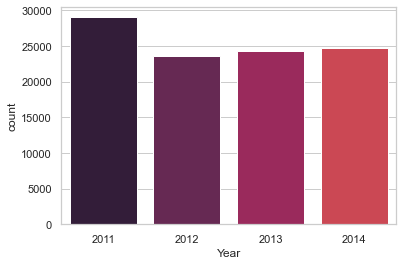

In [37]:
sns.countplot(x='Year', data=df)

C:\Users\msoum\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


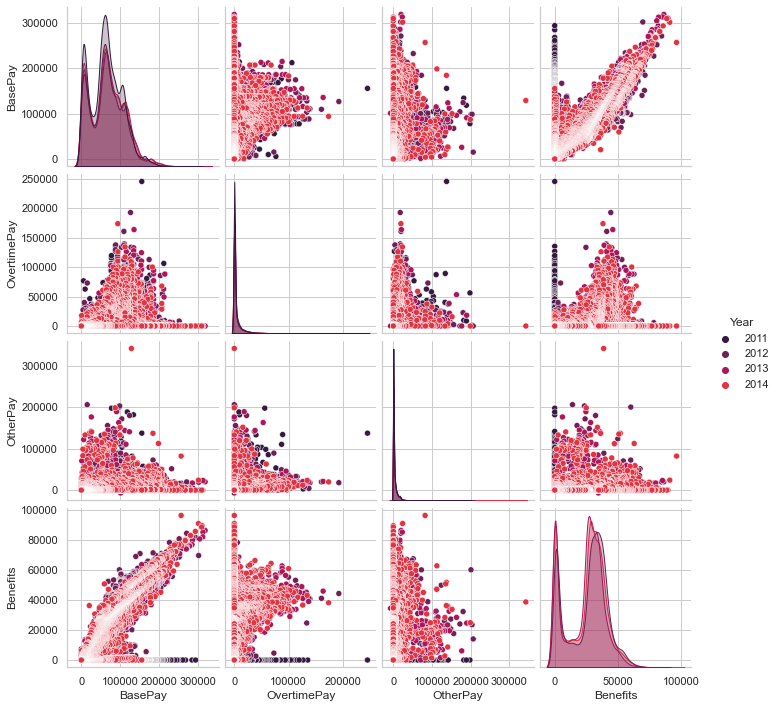

In [38]:
sns.pairplot(df, hue='Year')

### Categorical Encoding

In [39]:
# Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
df['Year'].unique()

array(['2011', '2012', '2013', '2014'], dtype=object)

In [42]:
label_encoder = LabelEncoder()

In [43]:
df['Year_Label'] = label_encoder.fit_transform(df['Year'])

In [44]:
df['Year_Label'].unique()

array([0, 1, 2, 3])

In [45]:
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,Year,Year_Label
Id,,,,,,
2,155966.02,245131.88,137811.38,0.0,2011,0
3,212739.13,106088.18,16452.60,0.0,2011,0
4,77916.00,56120.71,198306.90,0.0,2011,0
5,134401.60,9737.00,182234.59,0.0,2011,0
6,118602.00,8601.00,189082.74,0.0,2011,0


In [46]:
# One Hot Encoding

In [47]:
df = pd.get_dummies(df, columns=['Year'], drop_first=True)

# Year has values 2011, 2012, 2013, 2014
# So pd.get_dummies() wil create Year_2011, Year_2012, Year_2013, Year_2014
# Since drop_first=True, the first column (Year_2011) will be dropped

In [48]:
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,Year_Label,Year_2012,Year_2013,Year_2014
Id,,,,,,,,
2,155966.02,245131.88,137811.38,0.0,0,0,0,0
3,212739.13,106088.18,16452.60,0.0,0,0,0,0
4,77916.00,56120.71,198306.90,0.0,0,0,0,0
5,134401.60,9737.00,182234.59,0.0,0,0,0,0
6,118602.00,8601.00,189082.74,0.0,0,0,0,0


In [49]:
df.drop('Year_Label', axis=1, inplace=True)

In [50]:
df.head()

,BasePay,OvertimePay,OtherPay,Benefits,Year_2012,Year_2013,Year_2014
Id,,,,,,,
2,155966.02,245131.88,137811.38,0.0,0,0,0
3,212739.13,106088.18,16452.60,0.0,0,0,0
4,77916.00,56120.71,198306.90,0.0,0,0,0
5,134401.60,9737.00,182234.59,0.0,0,0,0
6,118602.00,8601.00,189082.74,0.0,0,0,0


### Feature Selection

In [51]:
# It doesn't matter what we select beacuse we are not performing ml today
X = df.drop('BasePay', axis=1)
y = df['BasePay']

### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling

In [ ]:
# Standardization

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
standard = StandardScaler()

In [56]:
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.transform(X_test)

# X_train_scaled = (X_train - X_train_mean) / X_train_std
# X_test_scaled = (X_test - X_train_mean) / X_train_std

# So, mean and std is calculated in fit

In [57]:
X_train.head()

,OvertimePay,OtherPay,Benefits,Year_2012,Year_2013,Year_2014
Id,,,,,,
46160,0.00,0.00,39303.54,1,0,0
48200,7886.46,7048.52,29226.45,1,0,0
56043,2956.26,873.93,29820.16,1,0,0
19947,7375.05,16844.24,0.00,0,0,0
51704,0.00,0.00,33696.99,1,0,0


In [58]:
print(X_train_scaled[:5])

[[-0.40859471 -0.41596135  1.25058869  1.82885304 -0.55917672 -0.56867343]
 [ 0.33811225  0.47881069  0.66712543  1.82885304 -0.55917672 -0.56867343]
 [-0.12868967 -0.3050206   0.70150123  1.82885304 -0.55917672 -0.56867343]
 [ 0.28969086  1.72232513 -1.02508529 -0.54679079 -0.55917672 -0.56867343]
 [-0.40859471 -0.41596135  0.92596959  1.82885304 -0.55917672 -0.56867343]]


In [59]:
X_train_scaled[:, 0].mean(), X_train_scaled[:, 0].std()

(-2.5946420878586825e-17, 1.0)

In [60]:
X_test_scaled[:, 0].mean(), X_test_scaled[:, 0].std()

(0.01658531767543423, 1.0281579536881464)

In [ ]:
# Min Max Scaler

In [68]:
ar = np.random.randint(1, 50, 10)

In [69]:
ar

array([46,  1,  1, 38, 47, 23,  2, 29, 13, 29])

In [70]:
ar = (ar - ar.min()) / (ar.max() - ar.min())

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
min_max = MinMaxScaler()

In [74]:
X_train = min_max.fit_transform(X_train)

In [75]:
X_test = min_max.transform(X_test)

In [76]:
X_train[:5]

array([[4.07943658e-08, 2.01753998e-02, 4.06992559e-01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.21723542e-02, 4.03220168e-02, 3.02643163e-01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.20599160e-02, 2.26733332e-02, 3.08791097e-01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00860896e-02, 6.83208902e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [4.07943658e-08, 2.01753998e-02, 3.48936105e-01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [77]:
X_train[:, 0].min()

0.0

In [78]:
X_train[:, 0].max()

1.0